In [3]:
#load the data
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


In [4]:
#define X_train and Y_train
X_train = data_train.loc[:,'T']
Y_train = data_train.loc[:,'rate']

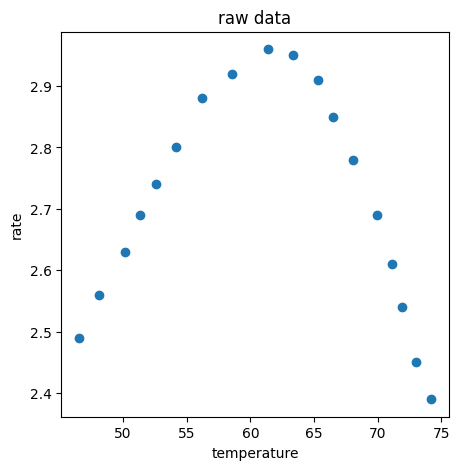

In [5]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [6]:
#linear regression model prediction
X_train = np.array(X_train).reshape(-1,1)
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,Y_train)

LinearRegression()

In [7]:
#load the test data
data_test = pd.read_csv('T-R-test.csv')
data_test.head()

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618


In [12]:
X_test = data_test.loc[:,'T']
Y_test = data_test.loc[:,'rate']
X_test = np.array(X_test).reshape(-1,1)

In [13]:
#make prediction on the training and testing data
Y_train_prediction = lr1.predict(X_train)
Y_test_prediction = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(Y_train,Y_train_prediction)
r2_test = r2_score(Y_test,Y_test_prediction)
print('training r2:',r2_train)
print('testing r2:',r2_test)

training r2: 0.016665703886982186
testing r2: -0.7583363437351327


In [14]:
#generate new data
X_range = np.linspace(40,90,300).reshape(-1,1)
Y_range_predict = lr1.predict(X_range)

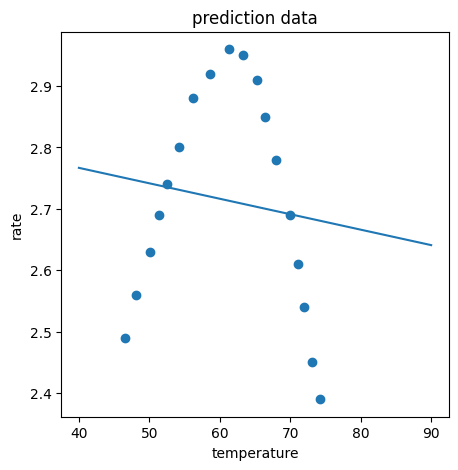

In [16]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range,Y_range_predict)
plt.scatter(X_train,Y_train)
plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [17]:
#多项式模型
#generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
print(X_2_train)

[[1.0000000e+00 4.6530000e+01 2.1650409e+03]
 [1.0000000e+00 4.8140000e+01 2.3174596e+03]
 [1.0000000e+00 5.0150000e+01 2.5150225e+03]
 [1.0000000e+00 5.1360000e+01 2.6378496e+03]
 [1.0000000e+00 5.2570000e+01 2.7636049e+03]
 [1.0000000e+00 5.4180000e+01 2.9354724e+03]
 [1.0000000e+00 5.6190000e+01 3.1573161e+03]
 [1.0000000e+00 5.8580000e+01 3.4316164e+03]
 [1.0000000e+00 6.1370000e+01 3.7662769e+03]
 [1.0000000e+00 6.3340000e+01 4.0119556e+03]
 [1.0000000e+00 6.5310000e+01 4.2653961e+03]
 [1.0000000e+00 6.6470000e+01 4.4182609e+03]
 [1.0000000e+00 6.8030000e+01 4.6280809e+03]
 [1.0000000e+00 6.9970000e+01 4.8958009e+03]
 [1.0000000e+00 7.1130000e+01 5.0594769e+03]
 [1.0000000e+00 7.1890000e+01 5.1681721e+03]
 [1.0000000e+00 7.3050000e+01 5.3363025e+03]
 [1.0000000e+00 7.4210000e+01 5.5071241e+03]]


In [18]:
lr2 = LinearRegression()
lr2.fit(X_2_train,Y_train)

Y_2_train_prediction = lr2.predict(X_2_train)
Y_2_test_prediction = lr2.predict(X_2_test)
r2_2_train = r2_score(Y_train,Y_2_train_prediction)
r2_2_test = r2_score(Y_test,Y_2_test_prediction)
print('training r2_2:',r2_2_train)
print('testing r2_2:',r2_2_test)

training r2_2: 0.970051540068943
testing r2: 0.996395455646867


In [19]:
X_2_range = np.linspace(40,90,300).reshape(-1,1)
X_2_range = poly2.transform(X_2_range)
Y_2_range_predict = lr2.predict(X_2_range)

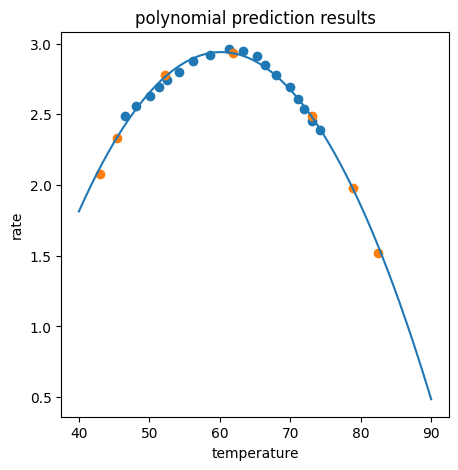

In [22]:
fig3 = plt.figure(figsize=(5,5))
plt.plot(X_range,Y_2_range_predict)
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test)
plt.title('polynomial prediction results')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [23]:
poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)
print(X_5_train)

[[1.00000000e+00 4.65300000e+01 2.16504090e+03 1.00739353e+05
  4.68740210e+06 2.18104820e+08]
 [1.00000000e+00 4.81400000e+01 2.31745960e+03 1.11562505e+05
  5.37061900e+06 2.58541599e+08]
 [1.00000000e+00 5.01500000e+01 2.51502250e+03 1.26128378e+05
  6.32533818e+06 3.17215710e+08]
 [1.00000000e+00 5.13600000e+01 2.63784960e+03 1.35479955e+05
  6.95825051e+06 3.57375746e+08]
 [1.00000000e+00 5.25700000e+01 2.76360490e+03 1.45282710e+05
  7.63751204e+06 4.01504008e+08]
 [1.00000000e+00 5.41800000e+01 2.93547240e+03 1.59043895e+05
  8.61699821e+06 4.66868963e+08]
 [1.00000000e+00 5.61900000e+01 3.15731610e+03 1.77409592e+05
  9.96864496e+06 5.60138160e+08]
 [1.00000000e+00 5.85800000e+01 3.43161640e+03 2.01024089e+05
  1.17759911e+07 6.89837560e+08]
 [1.00000000e+00 6.13700000e+01 3.76627690e+03 2.31136413e+05
  1.41848417e+07 8.70523734e+08]
 [1.00000000e+00 6.33400000e+01 4.01195560e+03 2.54117268e+05
  1.60957877e+07 1.01950720e+09]
 [1.00000000e+00 6.53100000e+01 4.26539610e+03 2.7

In [24]:
lr5 = LinearRegression()
lr5.fit(X_5_train,Y_train)

Y_5_train_prediction = lr5.predict(X_5_train)
Y_5_test_prediction = lr5.predict(X_5_test)
r2_5_train = r2_score(Y_train,Y_5_train_prediction)
r2_5_test = r2_score(Y_test,Y_5_test_prediction)
print('training r2_5:',r2_5_train)
print('testing r2_5:',r2_5_test)

training r2_5: 0.9978527267146483
testing r2_5: 0.5437828889274186


In [25]:
X_5_range = np.linspace(40,90,300).reshape(-1,1)
X_5_range = poly5.transform(X_5_range)
Y_5_range_predict = lr5.predict(X_5_range)

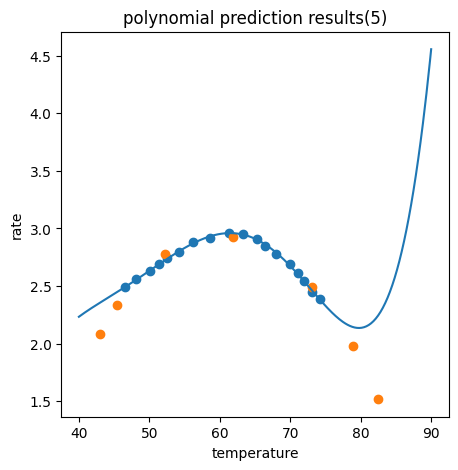

In [26]:
fig4 = plt.figure(figsize=(5,5))
plt.plot(X_range,Y_5_range_predict)
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test)
plt.title('polynomial prediction results(5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()